# Lab 6 - New Mexico

In [3]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [4]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

# Question 1 - Population Growth Rate

Option A: do the calculation with SQL

In [17]:
q1_sql = """
SELECT 
    p.year,
    p.pop,
    p.pop - LAG(p.pop) OVER (ORDER BY p.year) AS population_change,
    ROUND(
        100.0 * (p.pop - LAG(p.pop) OVER (ORDER BY p.year)) 
        / LAG(p.pop) OVER (ORDER BY p.year), 2
    ) AS growth_rate_percent
FROM population p
WHERE p.fips = '35'
ORDER BY p.year;

     """

In [18]:
import pandas as pd

q1_df = pd.read_sql(sql, con=conn)
q1_df.head() #show the top 5 rows

,year,pop,population_change,growth_rate_percent
0,2005,1887200,NaN,NaN
1,2006,1954599,67399.0,3.57
2,2007,1969915,15316.0,0.78
3,2008,1984356,14441.0,0.73
4,2009,2009671,25315.0,1.28


In [20]:
! pip install jupyter-ai-magics[all] -q

In [21]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [22]:
%load_ext jupyter_ai_magics

In [27]:
%%ai gpt4 -f code
use the {q1_df} data to create a line chart with the growth rate.
Chart must include the NM name in the title

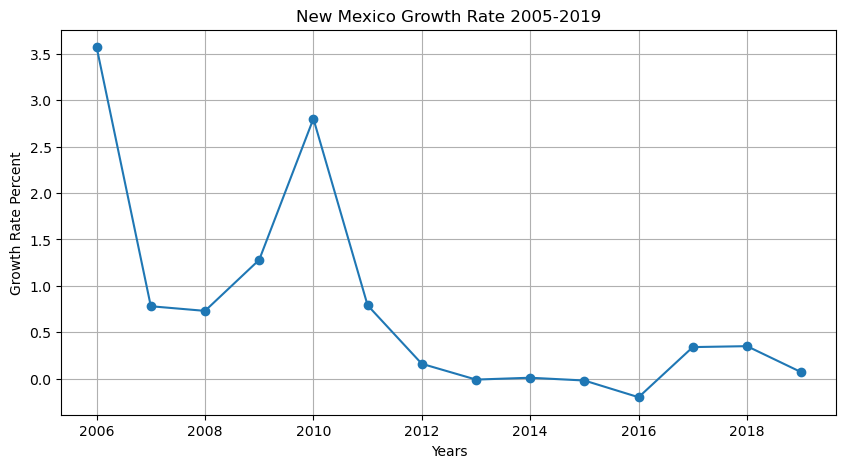

In [59]:
import matplotlib.pyplot as plt

years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
growth_rate_percent = [None, 3.57, 0.78, 0.73, 1.28, 2.80, 0.79, 0.16, -0.01, 0.01, -0.02, -0.20, 0.34, 0.35, 0.07]

plt.figure(figsize=(10,5))
plt.plot(years, growth_rate_percent, marker='o')
plt.title("New Mexico Growth Rate 2005-2019")
plt.xlabel("Years")
plt.ylabel("Growth Rate Percent")
plt.grid(True)
plt.show()

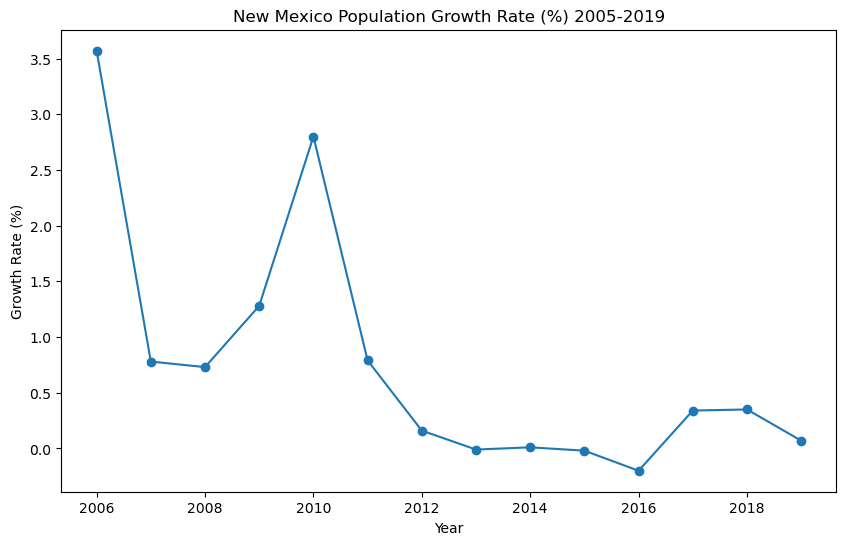

In [42]:
import matplotlib.pyplot as plt

# Data
year = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
growth_rate_percent = [None, 3.57, 0.78, 0.73, 1.28, 2.80, 0.79, 0.16, -0.01, 0.01, -0.02, -0.2, 0.34, 0.35, 0.07]

# Create figure and plot
plt.figure(figsize=(10, 6))
plt.plot(year, growth_rate_percent, marker='o')

# Add title and labels
plt.title("New Mexico Population Growth Rate (%) 2005-2019")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")

# Show plot
plt.show()

Q1 - Markdown Notes: This chart shows the year-over-year population growth rate for New Mexico. 

The calculation compares each year’s population to the previous year. 

Positive values represent growth, while negative values indicate decline. 

The trend highlights periods of stronger expansion versus slower growth, helping us understand demographic changes over time in the state.

Initially, the growth rate decreases, then increases, and subsequently decreases again. 

# Question 2 - Income and Population Relationship

In [29]:
query = """
SELECT 
    n.name AS state,
    p.year,
    p.pop,
    i.income
FROM population p
JOIN income i ON p.fips = i.fips AND p.year = i.year
JOIN name n ON p.fips = n.fips
WHERE p.fips = '35'
ORDER BY p.year;
"""

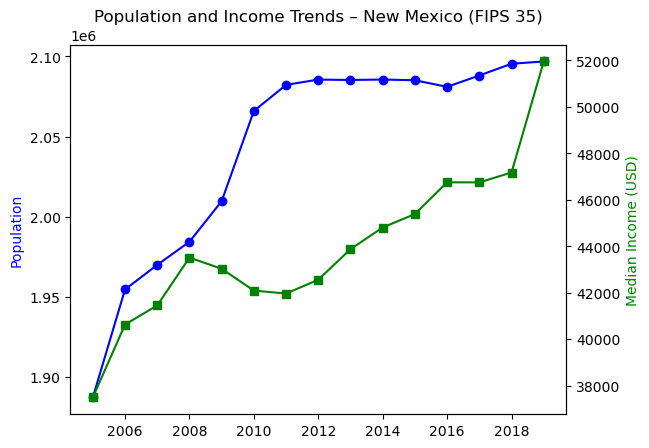

In [30]:
df = pd.read_sql(query, conn)

fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['pop'], color="blue", marker='o')
ax1.set_ylabel("Population", color="blue")

ax2 = ax1.twinx()
ax2.plot(df['year'], df['income'], color="green", marker='s')
ax2.set_ylabel("Median Income (USD)", color="green")

plt.title("Population and Income Trends – New Mexico (FIPS 35)")
plt.show()


Q2 – Markdown Notes: This compares population growth with median household income. 

Both trends generally rise, but income may fluctuate more, showing economic variation despite a steady population increase.

# Question 3 - Student Defined Question

In [43]:
! pip install jupyter-ai-magics[all] -q

In [44]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [45]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [51]:
q3_sql = """
SELECT
    n.name AS state,
    p.year,
    (p.pop - LAG(p.pop) OVER (ORDER BY p.year)) AS population_change
FROM population p
JOIN name n 
    ON p.fips = n.fips
WHERE p.fips = '35'
ORDER BY population_change DESC



"""

In [52]:
q3_df = pd.read_sql(q3_sql, conn)
q3_df.head()

,state,year,population_change
0,New Mexico,2005,NaN
1,New Mexico,2006,67399.0
2,New Mexico,2010,56261.0
3,New Mexico,2009,25315.0
4,New Mexico,2011,16292.0


In [58]:
%%ai gpt4 -f code

Use the data in {q3_df} to create a chart to highlight the year of the maximum pop increase, and include New Mexico in the chart title,
make sure to use the right data columns in the dataframe {q3_df}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'state': ['New Mexico']*15,
    'year': [2005, 2006, 2010, 2009, 2011, 2007, 2008, 2018, 2017, 2012, 2019, 2014, 2013, 2015, 2016],
    'population_change': [None, 67399.0, 56261.0, 25315.0, 16292.0, 15316.0, 14441.0, 7358.0, 7055.0, 3314.0, 1401.0, 285.0, -251.0, -463.0, -4094.0]
})

max_pop_increase_year = data.loc[data['population_change'].idxmax(), 'year']

plt.figure(figsize=(10, 6))
plt.bar(data['year'], data['population_change'])
plt.bar(max_pop_increase_year, data['population_change'].max(), color='r')
plt.title('New Mexico Maximum Population Increase in {}'.format(max_pop_increase_year))
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.show()

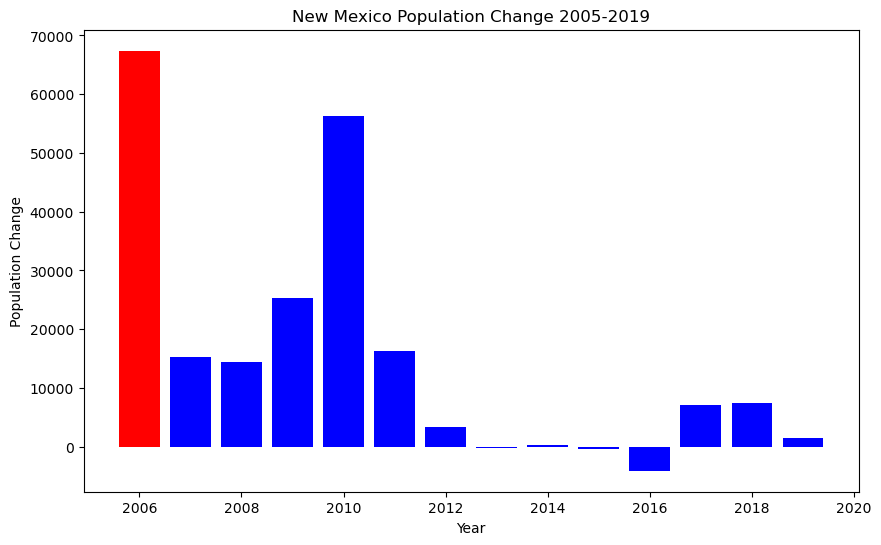

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# data
data = pd.DataFrame({"state":["New Mexico"]*15, 
                     "year": [2005, 2006, 2010, 2009, 2011, 2007, 2008, 2018, 2017, 2012, 2019, 2014, 2013, 2015, 2016],
                     "population_change": [None, 67399.0, 56261.0, 25315.0, 16292.0, 15316.0, 14441.0,7358.0, 7055.0, 3314.0, 1401.0, 285.0, -251.0, -463.0, -4094.0]})

# Create figure and plot
plt.figure(figsize=(10, 6))
plt.bar(data["year"], data["population_change"], color='b')

# Highlighting the year of max population increase
max_pop_inc_year = data["year"][data["population_change"].idxmax()]
plt.bar(max_pop_inc_year, data["population_change"].max(), color='r')

# Add title and labels
plt.title("New Mexico Population Change 2005-2019")
plt.xlabel("Year")
plt.ylabel("Population Change")

# Show plot
plt.show()

Q3- Markdown Notes:
This chart shows New Mexico’s year-over-year population change between 2005 and 2019.  
Each blue bar represents the numeric difference in population from the previous year, while the red bar highlights the year with the **largest increase**.

Positive bars indicate years when the state gained residents, and negative bars show years of population decline.  
The data suggests that New Mexico experienced its strongest growth in the highlighted year, followed by smaller gains or modest declines in later years.  

This type of visualization helps identify demographic shifts and periods of higher migration or economic opportunity that may have driven population growth in the state.
